In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [88]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [89]:
#!wget $data

In [90]:
df = pd.read_csv('laptops.csv')

In [91]:
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [92]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [93]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [94]:
use_columns = ['ram','storage', 'screen', 'final_price']

In [95]:
df = df[use_columns]

<Axes: xlabel='final_price', ylabel='Count'>

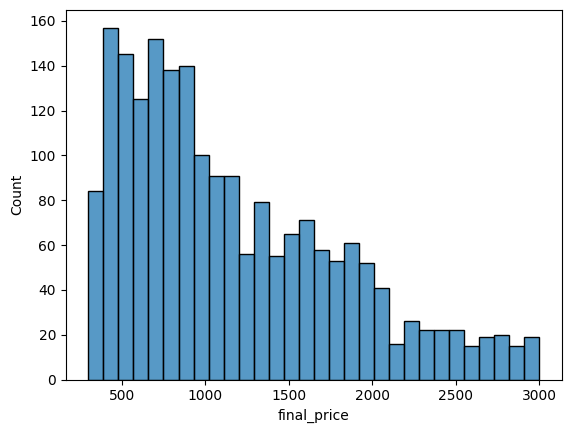

In [96]:
sns.histplot(df.final_price[(df.final_price < 3000) & (df.final_price > 300)], bins=30)

In [97]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [98]:
df['ram'].median()

np.float64(16.0)

In [99]:
n = len(df)
print(n)

2160


In [100]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_val, n_test, n_train)

432 432 1296


In [101]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [102]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860], shape=(2160,))

In [103]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [104]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [105]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [106]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [107]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [108]:
len(y_train)

1296

In [109]:
mean = df_train['screen'].mean()
mean

np.float64(15.163534416086618)

In [110]:
X_train = df_train.fillna(mean)

In [111]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [112]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

In [113]:
X_train = df_train.fillna(0)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train,y_pred)
score

np.float64(602.39)

In [114]:
X_val = df_val.fillna(0)
#w0, w = train_linear_regression(X_val, y_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
score

np.float64(597.36)

In [115]:
X_train = df_train.fillna(mean)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train,y_pred)
score

np.float64(602.18)

In [116]:
X_val = df_val.fillna(mean)
#w0, w = train_linear_regression(X_val, y_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
score

np.float64(600.27)

## Question 4

In [117]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [118]:
X_train = df_train.fillna(0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_train.dot(w)
    score = rmse(y_train, y_pred)
    
    print(r, w0, score)

0 676.8954853003995 602.39
0.01 676.2736817205587 602.39
0.1 670.7284836314063 602.39
1 619.9030834108207 602.41
5 463.7771697142356 602.71
10 352.79713367679835 603.13
100 66.92071440181994 604.99


In [119]:
X_train = df_train.fillna(0)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train, y_pred)


In [121]:
X_train = df_train.fillna(0)
X_val = df_val.fillna(0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, score)

0 597.36
0.01 597.36
0.1 597.35
1 597.21
5 597.01
10 597.06
100 597.9


## Question 5: Standard deviation of RMSE

In [122]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
use_columns = ['ram','storage', 'screen', 'final_price']
df = df[use_columns]
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


rmses = []

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = df_train.fillna(0)
    X_val = df_val.fillna(0)
    X_test = df_test.fillna(0)

    w0, w = train_linear_regression_reg(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(s, score)

    rmses.append(score)
    
    

0 565.45
1 636.8
2 588.96
3 597.81
4 571.96
5 573.24
6 647.34
7 550.44
8 587.33
9 576.1


In [123]:
np.std(rmses)

np.float64(29.176152950654732)

In [126]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
use_columns = ['ram','storage', 'screen', 'final_price']
df = df[use_columns]
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

X_train = df_train.fillna(0)
X_val = df_val.fillna(0)
X_test = df_test.fillna(0)

X_train = pd.concat([X_train, X_val])
y_train = np.concatenate([y_train, y_val])


def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

w0, w = train_linear_regression_reg(X_train, y_train)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(s, score)


9 608.61
